<b> NAME: SUNIL GHIMIRE </b> <br> <br>
<b> ID : 1928584 </b>

In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import random
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
import tensorflow as tf

Using TensorFlow backend.


In [2]:
imdb_dir = './data_imdb/'
print(os.listdir(imdb_dir))

['test', 'train']


In [3]:
print(os.listdir("./data_imdb/train/"))

['neg', 'pos']


In [4]:
print(os.listdir("./data_imdb/test/"))

['neg', 'pos']


In [5]:
# Assuming that there are maximum 10000 unique words across
# the reviews in the datasets
vocab_size = 10000 

#specifies maximum number of words to read from a review
max_length = 100

In [6]:
#Reading data into memory along with the labels.

def get_imdb_data(datatype):
    imdb_dir='data_imdb'

    #setting dataset directory path
    base_dir = os.path.join(imdb_dir, datatype)
    texts=[]
    labels=[]

    text_label = []
    
    label_value = {'neg':0, 'pos':1}
    
    for label_type in ['neg','pos']:
        dir_name = os.path.join(base_dir, label_type)
        
        for fname in os.listdir(dir_name):
            f =open(os.path.join(dir_name,fname), encoding='utf8')
            text_label.append((f.read(), label_value[label_type]))
            f.close()
    
    print(len(text_label))
    
    return text_label

In [7]:
def combine_data(*args):
    text_label = []
    
    for each in args:
        text_label.extend(each)
    
    return text_label

In [8]:
text_label = combine_data(get_imdb_data("train"), get_imdb_data("test"))
random.shuffle(text_label)

texts = []
labels = []

for t, l in text_label:
    texts.append(t)
    labels.append(l)

25000
25000


In [9]:
texts_train = texts[:25000]
labels_train = labels[:25000]
texts_test = texts[25000:]
labels_test = labels[25000:]


In [10]:
np.shape(labels_test)

(25000,)

In [11]:
encoded_training_documents = [one_hot(sentence, vocab_size)
                              for sentence in texts_train]
padded_training_documents = pad_sequences(
                                encoded_training_documents,
                                maxlen=max_length,
                                padding='post')

In [12]:
encoded_test_documents = [one_hot(sentence, vocab_size)
                              for sentence in texts_test]
# encoded_test_documents = [one_hot(data, len(data))]
padded_test_documents = pad_sequences(
                                encoded_test_documents,
                                maxlen=max_length,
                                padding='post')

In [13]:
model = Sequential()
model.add(Embedding(vocab_size,100, input_length = max_length))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,640,129
Trainable params: 1,640,129
Non-trainable params: 0
_________________________________________________________________


In [14]:
history_one = model.fit(padded_training_documents, labels_train, epochs=10, verbose = 1)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
25000/25000 [==============================] - 48s 2ms/step - loss: 0.4352 - acc: 0.7851
Epoch 2/10
25000/25000 [==============================] - 52s 2ms/step - loss: 0.1002 - acc: 0.9646
Epoch 3/10
25000/25000 [==============================] - 50s 2ms/step - loss: 0.0130 - acc: 0.9956
Epoch 4/10
25000/25000 [==============================] - 51s 2ms/step - loss: 0.0015 - acc: 0.9998
Epoch 5/10
25000/25000 [==============================] - 50s 2ms/step - loss: 1.6605e-04 - acc: 1.0000
Epoch 6/10
25000/25000 [==============================] - 52s 2ms/step - loss: 6.1892e-05 - acc: 1.0000: 
Epoch 7/10
25000/25000 [==============================] - 50s 2ms/step - loss: 3.7188e-05 - acc: 1.0000
Epoch 8/10
25000/25000 [==============================] - 50s 2ms/step - loss: 2.3871e-05 - acc: 1.0000
Epoch 9/10
25000/25000 [==============================] - 49s 2ms/step - loss: 1.5461e-05 - acc: 1.0000: 1s - loss
Epoch 10/10
25000/25000 [==============================] - 49s 2ms/

In [23]:
loss, accuracy = model.evaluate(padded_test_documents,labels_test,verbose=1)


25000/25000 [==============================] - 3s 100us/step


In [24]:
loss

1.0461322603702545

In [25]:
accuracy

0.8221200108528137

In [26]:
print('Accuracy for 25000 reviews : %f' % (accuracy*100),'\n','Loss for 25000 reviews    :',loss)

Accuracy for 25000 reviews : 82.212001 
 Loss for 25000 reviews    : 1.0461322603702545


In [89]:
data = "The movie is good. bad  and very bad bad " 

pre_encoded_documents = [one_hot(data, len(data))]
pre_padded_documents = pad_sequences(
                                pre_encoded_documents,
                                maxlen=max_length,
                                padding='post')

In [90]:
def predict_output(padded_documents):
    result = model.predict(pre_padded_documents)
    print(result)
        
    if result > 0.5:
        return "pos"
    
    else:
        return "neg"

In [91]:
# np.array(predict_output)
print(predict_output(pre_padded_documents))

[[0.1969519]]
neg


## Using 5000 movie reviews from the dataset

In [30]:
updated_texts_train = texts[:5000]
updated_labels_train = labels[:5000]
updated_texts_test = texts[:5000]
updated_labels_test = labels[:5000]

In [31]:
np.shape(updated_labels_test)

(5000,)

In [32]:
updated_encoded_training_documents = [one_hot(sentence, vocab_size)
                              for sentence in updated_texts_train]
updated_padded_training_documents = pad_sequences(
                                updated_encoded_training_documents,
                                maxlen=max_length,
                                padding='post')

In [33]:
updated_encoded_test_documents = [one_hot(sentence, vocab_size)
                              for sentence in updated_texts_test]
# encoded_test_documents = [one_hot(data, len(data))]
updated_padded_test_documents = pad_sequences(
                                updated_encoded_test_documents,
                                maxlen=max_length,
                                padding='post')

In [34]:
model_two = Sequential()
model_two.add(Embedding(vocab_size,100, input_length = max_length))
model_two.add(Flatten())
model_two.add(Dense(64,activation = 'relu'))
model_two.add(Dense(1, activation = 'sigmoid'))
model_two.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['acc'])
model_two.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 1,640,129
Trainable params: 1,640,129
Non-trainable params: 0
_________________________________________________________________


In [35]:
history_two = model_two.fit(updated_padded_training_documents, updated_labels_train, epochs=10, verbose = 1)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.6154 - acc: 0.6396
Epoch 2/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0997 - acc: 0.9714
Epoch 3/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0044 - acc: 1.0000
Epoch 4/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0013 - acc: 1.0000
Epoch 5/10
5000/5000 [==============================] - 8s 2ms/step - loss: 7.5493e-04 - acc: 1.0000
Epoch 6/10
5000/5000 [==============================] - 8s 2ms/step - loss: 5.0205e-04 - acc: 1.0000
Epoch 7/10
5000/5000 [==============================] - 8s 2ms/step - loss: 3.6000e-04 - acc: 1.0000
Epoch 8/10
5000/5000 [==============================] - 10s 2ms/step - loss: 2.7175e-04 - acc: 1.0000
Epoch 9/10
5000/5000 [==============================] - 9s 2ms/step - loss: 2.1118e-04 - acc: 1.0000A: 0s - loss: 2.1309e-04 - a
Epoch 10/10
5000/5000 [==============================] - 9s 2ms/step - loss: 1

In [38]:
loss_two, accuracy_two = model_two.evaluate(updated_padded_test_documents, updated_labels_test, verbose=1)
accuracy_two

5000/5000 [==============================] - 0s 97us/step


1.0

In [39]:
print('Accuracy for 5000 reviews : %f' % (accuracy_two*100),'\n','Loss for 5000 reviews    :',loss_two)

Accuracy for 5000 reviews : 100.000000 
 Loss for 5000 reviews    : 0.00014639673677738755


In [40]:
data = "The movie is good. bad  and very bad bad " 

updated_pre_encoded_documents = [one_hot(data, len(data))]
updated_pre_padded_documents = pad_sequences(
                                updated_pre_encoded_documents,
                                maxlen=max_length,
                                padding='post')
def updated_predict_output(padded_documents):
    result = model_two.predict(updated_pre_padded_documents)
    print(result)
        
    if result > 0.5:
        return "pos"
    
    else:
        return "neg"


In [41]:
print(updated_predict_output(updated_pre_padded_documents))

[[0.7892782]]
pos


### Part 2: Classification using Pre-Trained Model

In [42]:
maxlen = 100 #truncate revies over 100 words
training = 10000 # trains on 10000 samples, we selected small training which is able to set transfer learning
validation = 10000 # validates on 10000 samples
max_words = 10000 # considers only the top 10000 wordsin the dataset

In [43]:
tokenizer= Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
word_index = tokenizer.word_index
print('Total unique tokens : ', len(word_index))

Total unique tokens :  90921


In [44]:
data = pad_sequences(sequences , maxlen = maxlen)
labels = np.asarray(labels_train)
print('Data shape  :', data.shape)
print('Label shape :', labels.shape)


Data shape  : (25000, 100)
Label shape : (25000,)


In [45]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [46]:
X_train = data[:training]
y_train = labels[:training]
X_test = data[training:training + validation]
y_test = labels[training:training + validation]

In [47]:
X_train.shape

(10000, 100)

In [48]:
X_test.shape

(10000, 100)

In [49]:
y_train.shape

(10000,)

In [50]:
y_test.shape

(10000,)

In [51]:
## loading embeding information into memory
file = open('preTrained_data.txt', encoding = 'utf8')
embedding_index =  dict ()
for line in file:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype = 'float32')
    embedding_index[word] = coefs

file.close()

print('Total loaded word vectors',len(embedding_index))

Total loaded word vectors 400000


In [52]:
## limiting words into embedding files 

embedding_dim = 100 ## each word vector will be size of 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word , i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] =  embedding_vector

In [60]:
model_three = Sequential()
model_three.add(Embedding(vocab_size, 100 , input_length = max_length))
model_three.add(Flatten())
model_three.add(Dense(64,activation = 'relu'))
model_three.add(Dense(1, activation =  'sigmoid'))
model_three.layers[0].set_weights([embedding_matrix])
model_three.layers[0].trainable = False ## No more training as word embeddings
model_three.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,640,129
Trainable params: 1,640,129
Non-trainable params: 0
_________________________________________________________________


In [54]:
history_three = model_three.fit(X_train, y_train, epochs=10,  batch_size = 32, validation_data=(X_test, y_test))

Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 7s 692us/step - loss: 0.6539 - acc: 0.6106 - val_loss: 0.5981 - val_acc: 0.6856
Epoch 2/10
10000/10000 [==============================] - 7s 738us/step - loss: 0.5058 - acc: 0.7619 - val_loss: 0.5844 - val_acc: 0.6981
Epoch 3/10
10000/10000 [==============================] - 8s 842us/step - loss: 0.4090 - acc: 0.8198 - val_loss: 0.5843 - val_acc: 0.7125
Epoch 4/10
10000/10000 [==============================] - 8s 764us/step - loss: 0.3607 - acc: 0.8413 - val_loss: 0.6169 - val_acc: 0.7082
Epoch 5/10
10000/10000 [==============================] - 8s 816us/step - loss: 0.2909 - acc: 0.8837 - val_loss: 0.6691 - val_acc: 0.7023
Epoch 6/10
10000/10000 [==============================] - 10s 959us/step - loss: 0.2454 - acc: 0.9059 - val_loss: 0.7378 - val_acc: 0.6963
Epoch 7/10
10000/10000 [==============================] - 10s 960us/step - loss: 0.1926 - acc: 0.9304 - val_loss: 0.8012 

In [55]:
loss_three, accuracy_three = model_three.evaluate(padded_test_documents,labels_test,verbose=1)
print('Accuracy for Pretrained data : %f' % (accuracy_three*100),'\n','Loss for Pretrained data    :',loss_three)

25000/25000 [==============================] - 3s 113us/step
Accuracy for Pretrained data : 50.247997 
 Loss for Pretrained data    : 1.9407835279083252


In [92]:
data_pre = "The movie is good. bad  and very bad bad" 

pretrained_encoded_documents = [one_hot(data_pre, len(data_pre))]
pretrained_padded_documents = pad_sequences(
                              pretrained_encoded_documents,
                                maxlen=max_length,
                                padding='post')
def predict_output(padded_documents):
    pretrained_result = model_three.predict(pretrained_padded_documents)
    print(pretrained_result)
        
    if pretrained_result > 0.5:
        return "pos"
    
    else:
        return "neg"
# np.array(predict_output)
print(predict_output(pretrained_padded_documents))

[[0.4903724]]
neg


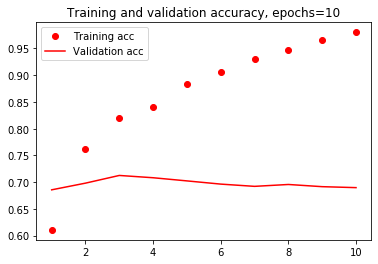

In [57]:
import matplotlib.pyplot as plt
acc = history_three.history['acc']
val_acc = history_three.history['val_acc']
loss = history_three.history['loss']
val_loss = history_three.history['val_loss']
epochs = range(1, len(acc) + 1)
# plot epochs and acc with red circle markers
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy, epochs=10')
plt.legend()
plt.figure()
# plot epochs and loss with blue circle markers
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss, epochs=5')
plt.legend()
plt.show()

Comparing with model_one and model_three, we have trained model_one with IMDB dataset with contains train and test folder but model_three we have used pretrained data where as pretrained model is a model that is created by someone else to solve similar kind of task. Instead of building a model from scratch to solve a similar porblem, we can use the model trained on other points as a strating point which may not be 100% accurate buit it saves time and effort. 


The advantage of using pretrained model are listed below:
1.  We will not spend serious amount of time in training model from scratch
2. We might not be worried about dataset
3. Pre-Trained models have work been trained to work on a lot of different things
4. The hard work for optimizing the model is already done, we need not to worried about it. 

I have worked with only 25000 training data-set in model_one but in model_three I have worked with 10000 training set. So, the model_one has 0.81 % accuracy and model_three has 0.50% accuracy which means this model three gives worse performance comparing to model_one. I think this pre-trained data contain lot of noise which we are able to see in above graph where validation_loss and validation_accuracy is higher than training accuracy and training loss. 

I think the defined model architecture does not make any sense and dataset provided for this assignment contains folder but this pretrained may contain csv file data which also decrease the accuracy. Another reason model_three has less accuracy is that data may get shuffle for each data point which creates an independenr change on the model, without beign biased by the same points before them. 